#  **Data Science Questions**

![Random Unsplash Image](https://brita.mx/wp-content/uploads/2021/03/Beneficios-de-usar-Machine-Learning.jpeg)

## INTRODUCTION

Data science is  the sexiest job in the 21st century as per  Harvard Business Review magazine and one of the most highly paid jobs as per Glassdoor website and many of people are learning all related to this career, so much so that there are several websites dedicated to this field.
Stack Exchange hosts sites on a multitude of fields and subjects such as physics, philosophy and of course [Data science](https://datascience.stackexchange.com/).

![image](https://dq-content.s3.amazonaws.com/469/se_sites.png)

Stack Exchange employs a reputation award system for its questions and answers. any post ( question/answer) is a post that received upvotes and downvotes, this popularize each post and identify how good is it.

next we provide some Stack Exchange websites that are relevant within data science field:
* [Cross Validated](https://stats.stackexchange.com/), statistics site
* [Artificial Intellifence](https://ai.stackexchange.com/),as know as AI
* [Mathematics](https://math.stackexchange.com/)
* [Stack Overflow](https://stackoverflow.com/), the most popular forum of programmers.

the next ones also are interesting i we include data engineering

* [Database Administrators](https://dba.stackexchange.com/)
* [Unix & Linux](https://unix.stackexchange.com/)
* [Software Engineering](https://softwareengineering.stackexchange.com/)

If we opening [list percent answered](https://stackexchange.com/sites?view=list#percentanswered) we can find a complete list from Stack Exchange websites but sorted by percentage of questions that received answers, Data science Stack Exchange (DSSE) is on the bottom of this list with 66% questions answered at the time of this writing.

## AIM

In this project we will figure out "What is the people want to learn about in data science?" through data analysis using pandas and plot visualization

## DSSE Exploration

Let's familiarize with website structure 

* **Home**: Once you get the DSEE link you access to **Home**, you find as header we can find "Explore our questions" and you see some popular tags such as: Machine-learning, Python, deep-learning etc. this section contains hot and recent questions

* **Questions**: Below of 'Home' are all listed question and it shows votes,answer,views, title and some tags to identify easily the question, shows the user who answered and lapse time the answer was asked.

* **Tags**: as per website says "A tag is a keyword or label that categorizes your question with other, similar questions. Using the right tags makes it easier for others to find and answer your question." here are listed the most popular tags and shows a brief description for each one, also shows the number of questions. you can sort tags by popular,name and new tags.

* **Users**: As this website is based on reputation, the user section shows users sorted by reputation, new users, voters, editors and moderators. reputation sort shows the most popular users as per reputations which is based on score, posts etc-

* **Unaswered**: shows the questions unanswered and here you also can ask a question 

* **Jobs**: re directs to stack overflow jobs wich publish jobs of programmers around the world


## Getting data!

After exploring DSSE we can find that tags are useful to categorize content and save time to do it by ourself.
Now we need to obtain the data, we could do it by we scrape but website gives a better solution to acquire the data. Stack Exchange provides a public data base for each of its websites, we can query and explore [Data science Stack Exchange's database](https://data.stackexchange.com/datascience/query/new).

Database scheme is divided by different tables and we can expand them clicking:

![image](https://dq-content.s3.amazonaws.com/469/dsde.png)

![gif](https://dq-content.s3.amazonaws.com/469/run_query.gif)

Basically we can use SQL languaje to query data which is really interesting and really useful.
For our purposes we can use the post table and select the next columns which are the most interesting:

* ID:An identification number for the post.
* CreationDate: The date and time of creation of the post.
* Score: The post's score.
* ViewCount: How many times the post was viewed.
* Tags: What tags were used.
* AnswerCount: How many answers the question got (only applicable to question posts).
* FavoriteCount: How many times the question was favored (only applicable to question posts).

We can note that the last columns, except tags column, contain information about how popular the post is. So let's query and get database in csv format


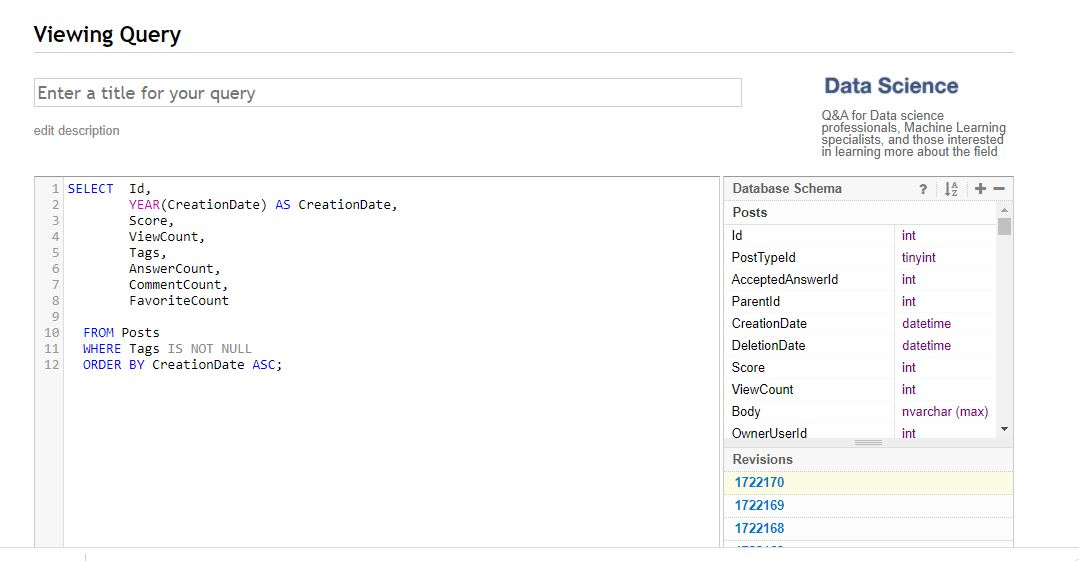

## Exploring data set 

Once we get the data base from DSSE we wil load all necessary libraries and find null values in order to clean the data


In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
from datetime import datetime
%matplotlib inline

In [2]:
#use parse_date to turn creationdate to datetime format
questions=pd.read_csv("/content/sample_data/QueryResults.csv",parse_dates=['CreationDate'])

In [3]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,CommentCount,FavoriteCount
0,2343,2014-01-01,2,5838,<machine-learning><bigdata><data-mining><clust...,4,1,2.0
1,2344,2014-01-01,2,856,<pandas>,0,1,NaN
2,2346,2014-01-01,6,178,<recommender-system><visualization>,4,3,1.0
3,2348,2014-01-01,2,2273,<classification><accuracy>,2,1,NaN
4,2349,2014-01-01,5,192,<machine-learning><data-mining><classification>,1,0,2.0


In [4]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28375 entries, 0 to 28374
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             28375 non-null  int64         
 1   CreationDate   28375 non-null  datetime64[ns]
 2   Score          28375 non-null  int64         
 3   ViewCount      28375 non-null  int64         
 4   Tags           28375 non-null  object        
 5   AnswerCount    28375 non-null  int64         
 6   CommentCount   28375 non-null  int64         
 7   FavoriteCount  7741 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 1.7+ MB


In [5]:
questions["FavoriteCount"].isnull().value_counts()

True     20634
False     7741
Name: FavoriteCount, dtype: int64

using msno library let's visualize the null values for each column for the entire dataset

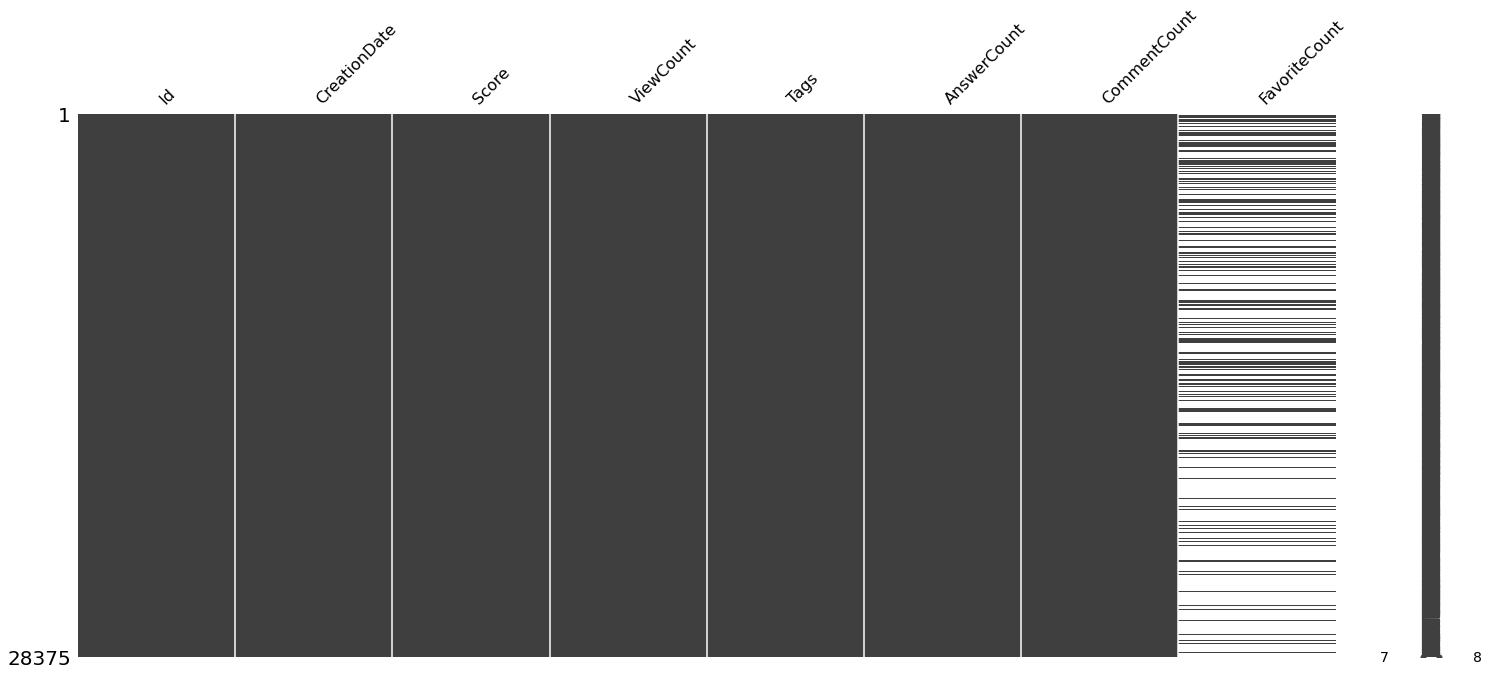

In [6]:
msno.matrix(questions)

We can see there are 20634 null values of 28375 for "favourite count" column in the dataframe, so we will fill these cells with 0 since it does not modify the final result and if we eliminate these rows we can lose valuable information and then we will convert the column format to integer

In [7]:
questions["FavoriteCount"]=questions["FavoriteCount"].fillna(0)

In [8]:
questions["FavoriteCount"]=questions["FavoriteCount"].astype(int)

In [9]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28375 entries, 0 to 28374
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             28375 non-null  int64         
 1   CreationDate   28375 non-null  datetime64[ns]
 2   Score          28375 non-null  int64         
 3   ViewCount      28375 non-null  int64         
 4   Tags           28375 non-null  object        
 5   AnswerCount    28375 non-null  int64         
 6   CommentCount   28375 non-null  int64         
 7   FavoriteCount  28375 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1.7+ MB


Now we do not have null values let's replace de symbols that tags column has such as >< and then split it by comma with the purpose of getting a standardized  format and list the tags for each question

In [10]:
questions["Tags"]=questions["Tags"].str.replace('><',',')\
                                               .str.replace('<', '')\
                                               .str.replace('>', '')\
                                               .str.split(',')


In [11]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,CommentCount,FavoriteCount
0,2343,2014-01-01,2,5838,"[machine-learning, bigdata, data-mining, clust...",4,1,2
1,2344,2014-01-01,2,856,[pandas],0,1,0
2,2346,2014-01-01,6,178,"[recommender-system, visualization]",4,3,1
3,2348,2014-01-01,2,2273,"[classification, accuracy]",2,1,0
4,2349,2014-01-01,5,192,"[machine-learning, data-mining, classification]",1,0,2


because we query de data turning the date into Year, the date format is set as the year- 1st january, to fix this we will convert the entire column just with its year



In [12]:
questions["CreationDate"]=questions["CreationDate"].dt.strftime("%Y")

In [13]:
questions["CreationDate"].value_counts()

2020    7266
2019    6776
2018    5353
2017    2918
2021    2226
2016    2116
2015    1161
2014     559
Name: CreationDate, dtype: int64

We can see we have data from 2014 to part of 2021 ( it is written at 2021 april)

In [14]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,CommentCount,FavoriteCount
0,2343,2014,2,5838,"[machine-learning, bigdata, data-mining, clust...",4,1,2
1,2344,2014,2,856,[pandas],0,1,0
2,2346,2014,6,178,"[recommender-system, visualization]",4,3,1
3,2348,2014,2,2273,"[classification, accuracy]",2,1,0
4,2349,2014,5,192,"[machine-learning, data-mining, classification]",1,0,2


## Analysing tags

We already clean the data, right now we are going to create a dataframe for each column starting from questions data set, each one of them will be made up of top 5 tags and number of how many times each tag was used,score,views,number of answers and number of times tag was favorite

In [15]:
tags_used_dict = {}
for lst in questions['Tags']:
    for tag in lst:
        if not tag in tags_used_dict:
            tags_used_dict[tag] = 0
        tags_used_dict[tag] += 1
        
def df_creation(dictionary,new_col_name):
    #creating data frame
    df=pd.DataFrame.from_dict(dictionary,orient="index").reset_index()
    #rename column name
    df.columns=["Tag",new_col_name]
    #order by ascending top 10
    df=df.sort_values(new_col_name,ascending=False).reset_index(drop=True)
    return df,df.head()

tags_count,tags_count_5=df_creation(tags_used_dict,"count")
    

In [16]:
tags_count.head(15)

,Tag,count
0,machine-learning,8963
1,python,5240
2,deep-learning,3763
3,neural-network,3696
4,classification,2585
5,keras,2322
6,scikit-learn,1813
7,tensorflow,1762
8,nlp,1671
9,time-series,1359


We quickly can observe that machine learning was the tag most used with 8963 times. We have our top 5 tags 

Now we have our top 5 we will use a new function in order to obtain the values of the columns scores,views,answers and favorite count for each top 5 tags found previously.

In [17]:

def find_popular_tag(column_name, new_df_column_name):
  
    #dictionary for all tags
    tags_dict = {}
    for index, row in questions.iterrows():
        lst = row['Tags']
        popularity_measure = row[column_name]
        for tag in lst:
            if not tag in tags_dict:
                tags_dict[tag] = 0
            tags_dict[tag] += popularity_measure
    #creating dataframe from dict and order in desc
    dataframe,dataframe_top5 = df_creation(tags_dict, new_df_column_name)
    
    return dataframe,dataframe_top5

#creating data frames
tags_scores,top5_scores= find_popular_tag(column_name='Score', new_df_column_name='Scores')

tags_views,top5_views= find_popular_tag(column_name='ViewCount', new_df_column_name='Views')

tags_answers,top5_answers= find_popular_tag(column_name='AnswerCount', new_df_column_name='Answers')

tags_favorite,top5_favorite= find_popular_tag(column_name='FavoriteCount',new_df_column_name='Favorite Count')

dfs = [
        tags_count, 
        tags_scores, 
        tags_views, 
        tags_answers, 
        tags_favorite
              ]
df_merged= reduce(lambda left,right: pd.merge(
                                                 left,right,on=['Tag'],
                                                 how='outer'),dfs)


In [18]:
df_top5=df_merged.head()

In [19]:
df_top5

,Tag,count,Scores,Views,Answers,Favorite Count
0,machine-learning,8963,21226,14029171,10903,7898
1,python,5240,10769,14713936,6046,3692
2,deep-learning,3763,9411,6648945,3997,3527
3,neural-network,3696,10240,6901198,4176,3947
4,classification,2585,5241,3114414,3093,1559


In [20]:
df_top5=df_top5.set_index("Tag")

Machine-learning for the period of 2014-2021 is the most used tag an also it has the highest score, answers and favorite count, but python was the tag with most views over machine-learning tag.

## Data visualization

Data visualization allow us to watch values and data in a quick way so we will plot the dataframe in bar format to get a better understanding of the data we obtain once we merge the dataframes

<Figure size 432x288 with 0 Axes>

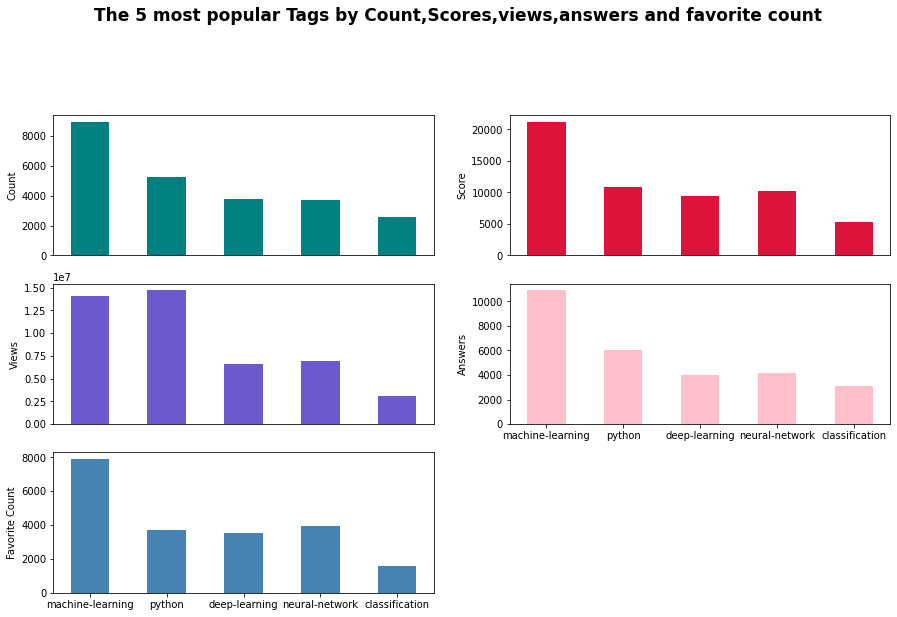

In [21]:
#title and size of plot
fig = plt.figure()
plt.figure(figsize=(15, 15))
plt.suptitle('The 5 most popular Tags by Count,Scores,views,answers and favorite count',size=17, weight='bold')

x = range(5)

plt.subplot(5,2,1)
ax=plt.bar(x,df_top5["count"],width=0.5,color="teal")
plt.ylabel('Count')
plt.xticks([],[])
plt.grid(False)

plt.subplot(5,2,2)
ax=plt.bar(x,df_top5["Scores"],width=0.5,color="crimson")
plt.ylabel('Score')
plt.xticks([],[])
plt.grid(False)


plt.subplot(5,2,3)
ax=plt.bar(x,df_top5["Views"],width=0.5,color="slateblue")
plt.ylabel('Views')
plt.xticks([],[])
plt.grid(False)

plt.subplot(5,2,4)
ax1=plt.bar(x,df_top5["Answers"],width=0.5,color="pink")
plt.ylabel('Answers')
plt.xticks(x, df_top5.index, rotation= "horizontal", ha='center')
plt.grid(False)

plt.subplot(5,2,5)
ax2=plt.bar(x,df_top5["Favorite Count"],width=0.5,color="steelblue")
plt.ylabel('Favorite Count')
plt.xticks(x, df_top5.index, rotation= "horizontal", ha='center')
plt.grid(False)

plt.show()

The plot shows that machine-learning tag in every section analyzed (except views) is the most popular by far followed by python, deep-learning, neural-networdk and classification.However, dispite deep-learning is higher in number of tags used than neural-link tag the plot shows that neural-link has higher numbers in views,favorite count, answers and scores than deep-learning.




## CORRELATION

we can figure out the correlation between the different columns and find interesting findings

In [22]:
corr = df_top5.corr()
corr.style.background_gradient(cmap='coolwarm')

,count,Scores,Views,Answers,Favorite Count
count,1.000000,0.978958,0.819128,0.997670,0.957472
Scores,0.978958,1.000000,0.744053,0.972861,0.995979
Views,0.819128,0.744053,1.000000,0.800184,0.712904
Answers,0.997670,0.972861,0.800184,1.000000,0.948247
Favorite Count,0.957472,0.995979,0.712904,0.948247,1.000000


* The number of tags was used is highly correlated with all columns

* scores are highly correlated all columns but just 0, 76 with number of views

* views are correlated with all columns but not as high as all columns, it means the tag that has high number of views can receive a good score, a good quantity of answers and can be favorite but it is not totally guaranteed

* number of answers is high correlated to all columns it means when number of answer of the post is high the scores, views and favorite count are high

* the last column explains something interesting if you have a high number of views it translate in a high number of favorite but is not too high as the other columns

## Plots per years

Now let's plot the dataframe but per years in order to understand the behaviour of the tags for each date from 2014-2021

First we will load the file database again replace with 0 the null values and change the format for the "Tags" column but we will not separate the tags by comma in order to do not obtain a list. Then we will create a new column with boolean values in order to get the rows that contains one of the 5 tags found previously and we will sum the values for views,scores, counts, favorite count and answers using pivot table and will plot the values.

In [23]:
#using function to obtain the tag and col name from data base
def turning(tag,col_name):
  questions2=pd.read_csv("/content/sample_data/QueryResults.csv",parse_dates=['CreationDate'])
  questions2["FavoriteCount"]=questions["FavoriteCount"].fillna(0)
  questions2["Tags"]=questions2["Tags"].str.replace('><',',')\
                                               .str.replace('<', '')\
                                               .str.replace('>', '')
                                               
  questions2["CreationDate"]=questions2["CreationDate"].dt.strftime("%Y")

  questions2[tag] = questions2['Tags'].str.contains(tag)
  tag=questions2[questions2[tag]==True]
  tag=tag.pivot_table(values=col_name, index='CreationDate', aggfunc=np.sum)
  tag=tag.reset_index(level='CreationDate')
  return tag

In [24]:
#using function for top 5 tags and column name
machine_learning=turning("machine-learning","ViewCount")
python=turning("python","ViewCount")
deep_learning	=turning("deep-learning","ViewCount")
neural_network=turning("neural-network","ViewCount")
classification=turning("classification","ViewCount")

<Figure size 432x288 with 0 Axes>

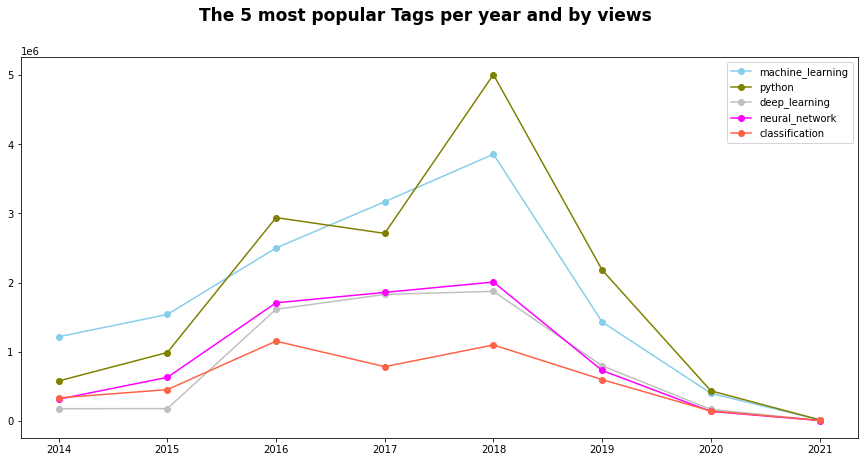

In [25]:
fig = plt.figure()
plt.figure(figsize=(15, 7))
plt.suptitle('The 5 most popular Tags per year and by views',size=17, weight='bold')
plt.plot('CreationDate','ViewCount', data=machine_learning, marker='o',color='skyblue',label="machine_learning")
plt.plot('CreationDate','ViewCount', data=python, marker='o', color='olive',label="python")
plt.plot('CreationDate','ViewCount', data=deep_learning, marker='o', color='silver',label="deep_learning")
plt.plot('CreationDate','ViewCount', data=neural_network, marker='o', color='magenta',label="neural_network")
plt.plot('CreationDate','ViewCount', data=classification, marker='o', color='tomato',label="classification")
plt.legend()

machine learning tag started being the most viewed but in the middle  between 2015 and 2016 python setted as the most viewed being 2018 its peak but all top 5 get decrease from 2018. 

In [26]:
machine_learning=turning("machine-learning","Score")
python=turning("python","Score")
deep_learning	=turning("deep-learning","Score")
neural_network=turning("neural-network","Score")
classification=turning("classification","Score")

<Figure size 432x288 with 0 Axes>

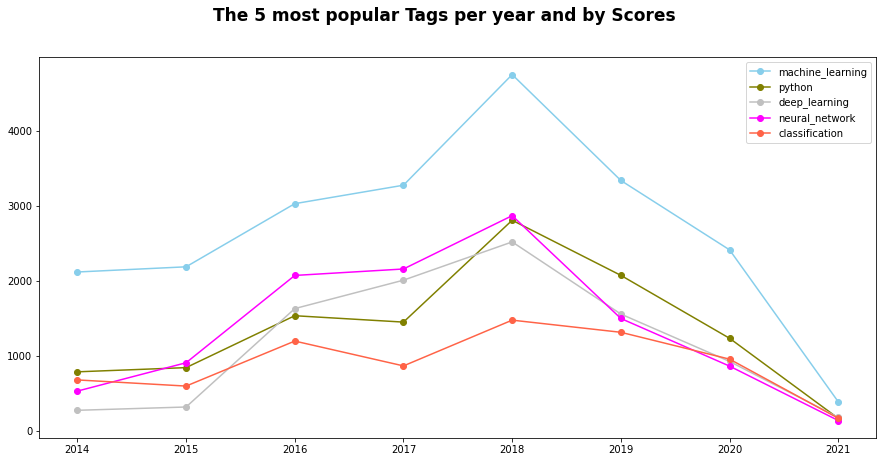

In [27]:
fig = plt.figure()
plt.figure(figsize=(15, 7))
plt.suptitle('The 5 most popular Tags per year and by Scores',size=17, weight='bold')
plt.plot('CreationDate','Score', data=machine_learning, marker='o',color='skyblue',label="machine_learning")
plt.plot('CreationDate','Score', data=python, marker='o', color='olive',label="python")
plt.plot('CreationDate','Score', data=deep_learning, marker='o', color='silver',label="deep_learning")
plt.plot('CreationDate','Score', data=neural_network, marker='o', color='magenta',label="neural_network")
plt.plot('CreationDate','Score', data=classification, marker='o', color='tomato',label="classification")
plt.legend()

machine learning is the tag most scored in each year but from 2018 all the scores get down

In [28]:
machine_learning=turning("machine-learning","AnswerCount")
python=turning("python","AnswerCount")
deep_learning	=turning("deep-learning","AnswerCount")
neural_network=turning("neural-network","AnswerCount")
classification=turning("classification","AnswerCount")

<Figure size 432x288 with 0 Axes>

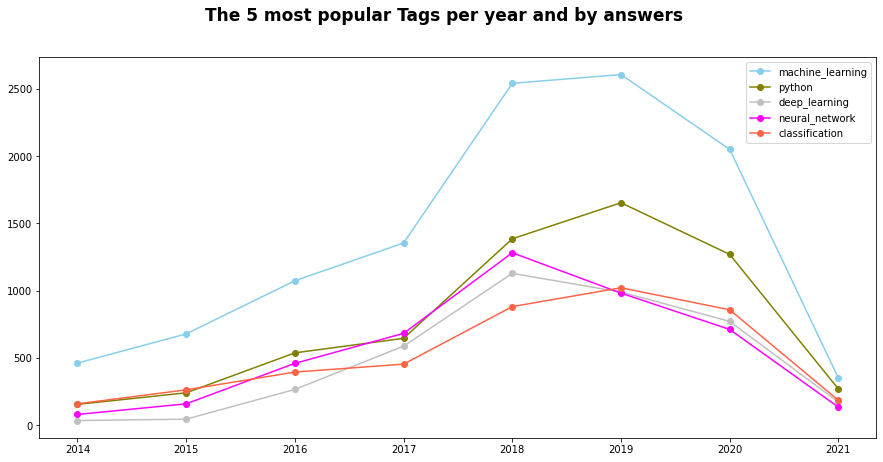

In [29]:
fig = plt.figure()
plt.figure(figsize=(15, 7))
plt.suptitle('The 5 most popular Tags per year and by answers',size=17, weight='bold')
plt.plot('CreationDate','AnswerCount', data=machine_learning, marker='o',color='skyblue',label="machine_learning")
plt.plot('CreationDate','AnswerCount', data=python, marker='o', color='olive',label="python")
plt.plot('CreationDate','AnswerCount', data=deep_learning, marker='o', color='silver',label="deep_learning")
plt.plot('CreationDate','AnswerCount', data=neural_network, marker='o', color='magenta',label="neural_network")
plt.plot('CreationDate','AnswerCount', data=classification, marker='o', color='tomato',label="classification")
plt.legend()

machine learning is the tag most scored but from 2018 neural network pass from 3rd positions to the last one 

In [30]:
machine_learning=turning("machine-learning","FavoriteCount")
python=turning("python","FavoriteCount")
deep_learning	=turning("deep-learning","FavoriteCount")
neural_network=turning("neural-network","FavoriteCount")
classification=turning("classification","FavoriteCount")

<Figure size 432x288 with 0 Axes>

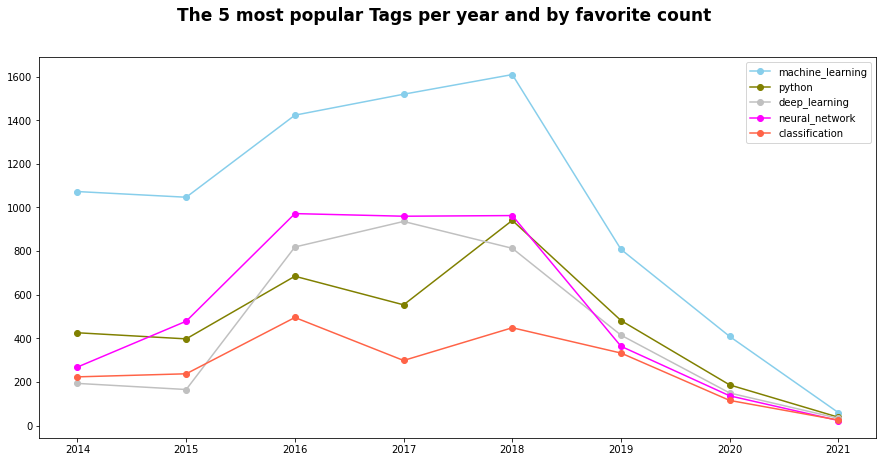

In [31]:
fig = plt.figure()
plt.figure(figsize=(15, 7))
plt.suptitle('The 5 most popular Tags per year and by favorite count',size=17, weight='bold')
plt.plot('CreationDate','FavoriteCount', data=machine_learning, marker='o',color='skyblue',label="machine_learning")
plt.plot('CreationDate','FavoriteCount', data=python, marker='o', color='olive',label="python")
plt.plot('CreationDate','FavoriteCount', data=deep_learning, marker='o', color='silver',label="deep_learning")
plt.plot('CreationDate','FavoriteCount', data=neural_network, marker='o', color='magenta',label="neural_network")
plt.plot('CreationDate','FavoriteCount', data=classification, marker='o', color='tomato',label="classification")
plt.legend()

machine learning is the tag with most favorite count by far but neural network tag get down from 2018 to the last position 

Now we will modify the function set previously in order to obtain the number of tags used per year for each tag of the top 5 tags

In [32]:
def count(tag):
  questions2=pd.read_csv("/content/sample_data/QueryResults.csv",parse_dates=['CreationDate'])
  questions2["FavoriteCount"]=questions["FavoriteCount"].fillna(0)
  questions2["Tags"]=questions2["Tags"].str.replace('><',',')\
                                               .str.replace('<', '')\
                                               .str.replace('>', '')
                                               
  questions2["CreationDate"]=questions2["CreationDate"].dt.strftime("%Y")

  questions2[tag] = questions2['Tags'].str.contains(tag)
  tag=questions2[questions2[tag]==True]
  tag=tag.pivot_table(values=tag, index='CreationDate', aggfunc=len)
  tag=tag.reset_index(level='CreationDate')
  return tag

In [33]:
machine_learning=count("machine-learning")
python= count("python")
deep_learning	=count("deep-learning")
neural_network=count("neural-network")
classification=count("classification")


<Figure size 432x288 with 0 Axes>

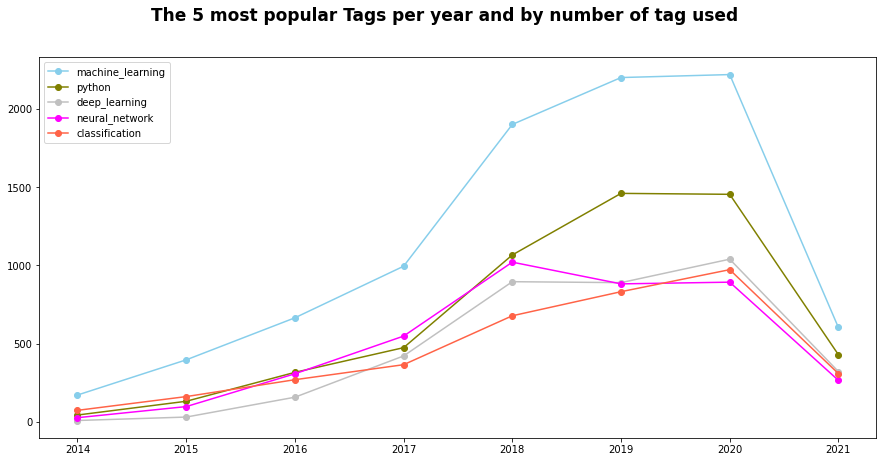

In [34]:
fig = plt.figure()
plt.figure(figsize=(15, 7))
plt.suptitle('The 5 most popular Tags per year and by number of tag used',size=17, weight='bold')
plt.plot('CreationDate','machine-learning', data=machine_learning, marker='o',color='skyblue',label="machine_learning")
plt.plot('CreationDate','python', data=python, marker='o', color='olive',label="python")
plt.plot('CreationDate','deep-learning', data=deep_learning, marker='o', color='silver',label="deep_learning")
plt.plot('CreationDate','neural-network', data=neural_network, marker='o', color='magenta',label="neural_network")
plt.plot('CreationDate','classification', data=classification, marker='o', color='tomato',label="classification")
plt.legend()

from 2014 to 2021 machine learning was the most used tag being 2020 the peak just only by python tag

## Findings

After all this travel analysing dsse we deploy interesting outcomes:


*   DSSE is an interesting website to find questions and answers about Data science
*   We do need to scrape data from this site since this website has a valuable function, we can query using SQL lenguaje
* Each questions has several tags
* There are several null values for favorite counts but is better to fill these null values with 0 and with this change we did not lose important data
* Machine learning is the tag most used in DSSE followed by Python tag 
* Python is the language most popular, R language is the second one but it is in 11 position as most used tag
* Python is the tag most viewed in DSSE despite machine learning is the tag most used
* All columns are highly correlated
* Neural network tag in every plot is in 3rd position but from 2018 it goes down to the 5th position, could be people in forums is most interested in machine-learning and classification tags
* There is something interesting that plots show, from 2018 for each one of them  the values go down but number of tags used increase each year (we do not take 2021 into account because it only has data until april), it could be due to when we query the data we eliminated null values in tags, so propably from 2018 the tags was not mandatory to answer or.
* Machine learning is the people want to learn about in data science
